In [1]:
from pytz import timezone
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import datetime
import MetaTrader5 as mt5
import pandas as pd
import pytz

utc_tz = timezone('UTC')
pd.set_option('display.max_columns', 500) # number of columns to be displayed
pd.set_option('display.width', 1500)      # max table width to display
 

if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()

In [2]:
currency_pair =["EURUSD","EURGBP","EURJPY","EURAUD","EURNZD",
"EURCHF","EURCAD","GBPUSD", "GBPJPY","GBPAUD","GBPNZD","GBPCAD",
"GBPCHF","USDCAD", "USDJPY","CHFJPY","CADJPY","NZDJPY","AUDJPY",
"AUDNZD","AUDCAD", "NZDUSD","NZDCAD","NZDCHF","AUDCHF","CADCHF",
"AUDUSD","USDCHF"]

time_frame=[mt5.TIMEFRAME_M1, mt5.TIMEFRAME_M5, mt5.TIMEFRAME_M15, mt5.TIMEFRAME_M30,
mt5.TIMEFRAME_H1, mt5.TIMEFRAME_D1,mt5.TIMEFRAME_W1]


In [3]:
# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
now = datetime.now()
# create 'datetime' object in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 1, 10, tzinfo=timezone)
lookback = 15

In [4]:
# create DataFrame out of the obtained data
currency_strength = pd.DataFrame()
rsi_df=pd.DataFrame()

In [5]:
#period=mt5.TIMEFRAME_H8
period=mt5.TIMEFRAME_D1
start=time.time()

In [6]:
import talib
import numpy

In [7]:
#df = pd.DataFrame([list(ohlc)],columns = ['Time','Open', 'Low', 'High', 'Close', 'tickVolume','Spread', 'realVolume'])

In [8]:
for pair in currency_pair:
    ohlc = mt5.copy_rates_from(pair, period, datetime.now(), lookback)
    df = pd.DataFrame(ohlc)
    rsi_df[pair]=talib.RSI(df.close,7)

In [9]:
rsi_df.tail()
strength=pd.DataFrame()
strength["USD"]=1/7*((100-rsi_df.EURUSD)+(100-rsi_df.GBPUSD)+\
    rsi_df.USDCAD+rsi_df.USDJPY+(100-rsi_df.NZDUSD)+\
        (100-rsi_df.AUDUSD)+rsi_df.USDCHF)
strength["EUR"]=1/7*(rsi_df.EURUSD+rsi_df.EURGBP+\
    rsi_df.EURJPY+rsi_df.EURAUD+rsi_df.EURNZD+rsi_df.EURCHF+\
        rsi_df.EURCAD)
strength["GBP"]=1/7*(rsi_df.GBPUSD+rsi_df.GBPJPY+\
    rsi_df.GBPAUD+rsi_df.GBPNZD+rsi_df.GBPCAD+rsi_df.GBPCHF+\
        (100-rsi_df.EURGBP))
strength["CHF"]=1/7*((100-rsi_df.EURCHF)+(100-rsi_df.GBPCHF)+\
    (100-rsi_df.NZDCHF)+(100-rsi_df.AUDCHF)+(100-rsi_df.CADCHF)+\
        rsi_df.CHFJPY+(100-rsi_df.USDCHF))
strength["JPY"]=1/7*((100-rsi_df.EURJPY)+(100-rsi_df.GBPJPY)+\
    (100-rsi_df.USDJPY)+(100-rsi_df.CHFJPY)+(100-rsi_df.CADJPY)+\
        (100-rsi_df.NZDJPY)+(100-rsi_df.AUDJPY))
strength["AUD"]=1/7*((100-rsi_df.EURAUD)+(100-rsi_df.GBPAUD)+\
    (100-rsi_df.AUDJPY)+rsi_df.AUDNZD+rsi_df.AUDCAD+
    rsi_df.AUDCHF+rsi_df.AUDUSD)
strength["CAD"]=1/7*((100-rsi_df.EURCAD)+(100-rsi_df.GBPCAD)+\
    (100-rsi_df.USDCAD)+rsi_df.CADJPY+(100-rsi_df.AUDCAD)+\
        (100-rsi_df.NZDCAD)+rsi_df.CADCHF)
strength["NZD"]=1/7*((100-rsi_df.EURNZD)+(100-rsi_df.GBPNZD)+\
    rsi_df.NZDJPY+rsi_df.NZDUSD+rsi_df.NZDCAD+rsi_df.NZDCHF+\
        (100-rsi_df.AUDNZD))

strength.tail()
strength.iloc[-2]
strength.iloc[-11]

USD   NaN
EUR   NaN
GBP   NaN
CHF   NaN
JPY   NaN
AUD   NaN
CAD   NaN
NZD   NaN
Name: 4, dtype: float64

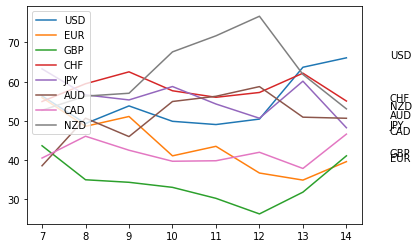

In [10]:
'''
plt.plot(strength.USD, label="USD")
plt.plot(strength.EUR, label="EUR")
plt.plot(strength.GBP, label="GBP")
plt.plot(strength.JPY, label="JPY")
plt.plot(strength.CAD, label="CAD")
plt.plot(strength.NZD, label="NZD")
plt.plot(strength.AUD, label="AUD")
plt.plot(strength.CHF, label="CHF")
plt.text(len(strength),strength.USD.iloc[-1], "USD")
plt.text(len(strength),strength.EUR.iloc[-1], "EUR")
plt.text(len(strength),strength.GBP.iloc[-1], "GBP")
plt.text(len(strength),strength.JPY.iloc[-1], "JPY")
plt.text(len(strength),strength.CAD.iloc[-1], "CAD")
plt.text(len(strength),strength.NZD.iloc[-1], "NZD")
plt.text(len(strength),strength.AUD.iloc[-1], "AUD")
plt.text(len(strength),strength.CHF.iloc[-1], "CHF")
plt.legend(loc="upper left")
plt.show()'''

currency = ["USD","EUR","GBP","CHF","JPY","AUD","CAD","NZD"]


# shut down connection to MetaTrader 5
mt5.shutdown()
# request connection status and parameters
#function to plot strength
def plot_strength(strength):
    for x in currency:
        plt.plot(strength[x], label=x)
        plt.text(len(strength),strength[x].iloc[-1], x)
    plt.legend(loc="upper left")
    plt.show()

plot_strength(strength)


matching=[x for x in currency_pair if 'USD' in x]
def normalized_strength(strength):
    normalized_strength=pd.DataFrame()
    for z in currency:
        matching=[x for x in currency_pair if z in x]
        for x in matching:
            normalized_strength[x]=strength[x[0:3]]-strength[x[3:6]]
            normalized_strength[x]=strength[x[0:3]]/strength[x[3:6]]
            normalized_strength[x]-=normalized_strength[x].mean()
            normalized_strength[x]/=normalized_strength[x].std()
    return normalized_strength

df = normalized_strength(strength)

In [11]:
strength.dropna()

,USD,EUR,GBP,CHF,JPY,AUD,CAD,NZD
7,56.376550,55.939395,43.678161,54.949374,63.258648,38.584387,40.545690,52.715722
8,49.336379,48.626906,35.016011,59.471173,56.639382,50.710040,46.105033,56.330577
9,53.828947,51.135286,34.370894,62.507671,55.350379,46.014310,42.538889,57.052078
10,49.904661,41.110452,33.082551,57.685461,58.764194,54.953031,39.731421,67.588138
11,49.081625,43.535071,30.284903,56.024409,54.314737,56.282195,39.859474,71.685155
12,50.475206,36.732655,26.316999,57.250438,50.688705,58.745851,42.019559,76.668363
13,63.677856,34.932972,31.863093,62.166472,60.128962,50.958842,37.893516,61.838730
14,66.075539,39.635067,41.115559,55.067385,48.265771,50.681422,46.644651,53.071834


In [12]:
if strength['EUR'].loc[strength.index[-1]] > strength['USD'].loc[strength.index[-1]]:
    EURUSD = 'Bullish'
else:
    EURUSD = 'Bearish'
if strength['EUR'].loc[strength.index[-1]] > strength['GBP'].loc[strength.index[-1]]:
    EURGBP = 'Bullish'
else:
    EURGBP = 'Bearish'
if strength['EUR'].loc[strength.index[-1]] > strength['JPY'].loc[strength.index[-1]]:
    EURJPY = 'Bullish'
else:
    EURJPY = 'Bearish'
if strength['EUR'].loc[strength.index[-1]] > strength['AUD'].loc[strength.index[-1]]:
    EURAUD = 'Bullish'
else:
    EURAUD = 'Bearish'
if strength['EUR'].loc[strength.index[-1]] > strength['NZD'].loc[strength.index[-1]]:
    EURNZD = 'Bullish'
else:
    EURNZD = 'Bearish'
if strength['EUR'].loc[strength.index[-1]] > strength['CHF'].loc[strength.index[-1]]:
    EURCHF = 'Bullish'
else:
    EURCHF = 'Bearish'
if strength['EUR'].loc[strength.index[-1]] > strength['CAD'].loc[strength.index[-1]]:
    EURCAD = 'Bullish'
else:
    EURCAD = 'Bearish'

In [13]:
if strength['GBP'].loc[strength.index[-1]] > strength['USD'].loc[strength.index[-1]]:
    GBPUSD = 'Bullish'
else:
    GBPUSD = 'Bearish'
if strength['GBP'].loc[strength.index[-1]] > strength['JPY'].loc[strength.index[-1]]:
    GBPJPY = 'Bullish'
else:
    GBPJPY = 'Bearish'
if strength['GBP'].loc[strength.index[-1]] > strength['AUD'].loc[strength.index[-1]]:
    GBPAUD = 'Bullish'
else:
    GBPAUD = 'Bearish'
if strength['GBP'].loc[strength.index[-1]] > strength['NZD'].loc[strength.index[-1]]:
    GBPNZD = 'Bullish'
else:
    GBPNZD = 'Bearish'
if strength['GBP'].loc[strength.index[-1]] > strength['CHF'].loc[strength.index[-1]]:
    GBPCHF = 'Bullish'
else:
    GBPCHF = 'Bearish'
if strength['GBP'].loc[strength.index[-1]] > strength['CAD'].loc[strength.index[-1]]:
    GBPCAD = 'Bullish'
else:
    GBPCAD = 'Bearish'

In [14]:
if strength['USD'].loc[strength.index[-1]] > strength['CAD'].loc[strength.index[-1]]:
    USDCAD = 'Bullish'
else:
    USDCAD = 'Bearish'
if strength['USD'].loc[strength.index[-1]] > strength['JPY'].loc[strength.index[-1]]:
    USDJPY = 'Bullish'
else:
    USDJPY = 'Bearish'
if strength['USD'].loc[strength.index[-1]] > strength['CHF'].loc[strength.index[-1]]:
    USDCHF = 'Bullish'
else:
    USDCHF = 'Bearish'

In [15]:
if strength['CAD'].loc[strength.index[-1]] > strength['JPY'].loc[strength.index[-1]]:
    CADJPY = 'Bullish'
else:
    CADJPY = 'Bearish'
if strength['CHF'].loc[strength.index[-1]] > strength['JPY'].loc[strength.index[-1]]:
    CHFJPY = 'Bullish'
else:
    CHFJPY = 'Bearish'
if strength['NZD'].loc[strength.index[-1]] > strength['JPY'].loc[strength.index[-1]]:
    NZDJPY = 'Bullish'
else:
    NZDJPY = 'Bearish'
if strength['AUD'].loc[strength.index[-1]] > strength['JPY'].loc[strength.index[-1]]:
    AUDJPY = 'Bullish'
else:
    AUDJPY = 'Bearish'
if strength['AUD'].loc[strength.index[-1]] > strength['NZD'].loc[strength.index[-1]]:
    AUDNZD = 'Bullish'
else:
    AUDNZD = 'Bearish'
if strength['AUD'].loc[strength.index[-1]] > strength['CAD'].loc[strength.index[-1]]:
    AUDCAD = 'Bullish'
else:
    AUDCAD = 'Bearish'

In [16]:
if strength['NZD'].loc[strength.index[-1]] > strength['USD'].loc[strength.index[-1]]:
    NZDUSD = 'Bullish'
else:
    NZDUSD = 'Bearish'
if strength['NZD'].loc[strength.index[-1]] > strength['CHF'].loc[strength.index[-1]]:
    NZDCHF = 'Bullish'
else:
    NZDCHF = 'Bearish'
if strength['NZD'].loc[strength.index[-1]] > strength['CAD'].loc[strength.index[-1]]:
    NZDCAD = 'Bullish'
else:
    NZDCAD = 'Bearish'

In [17]:
if strength['AUD'].loc[strength.index[-1]] > strength['USD'].loc[strength.index[-1]]:
    AUDUSD = 'Bullish'
else:
    AUDUSD = 'Bearish'
if strength['AUD'].loc[strength.index[-1]] > strength['CHF'].loc[strength.index[-1]]:
    AUDCHF = 'Bullish'
else:
    AUDCHF = 'Bearish'
if strength['CAD'].loc[strength.index[-1]] > strength['CHF'].loc[strength.index[-1]]:
    CADCHF = 'Bullish'
else:
    CADCHF = 'Bearish'

In [20]:
MS = eval('EURCAD')
MS

'Bearish'

In [ ]:
end=time.time()
time_taken=end-start
print(time_taken/60)